In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [3]:
data_slice = df[['Churn', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Area']]

In [4]:
data_slice

,Churn,Children,Age,Income,Marital,Gender,Area
0,No,0,68,28561.99,Widowed,Male,Urban
1,Yes,1,27,21704.77,Married,Female,Urban
2,No,4,50,9609.57,Widowed,Female,Urban
3,No,1,48,18925.23,Married,Male,Suburban
4,Yes,0,83,40074.19,Separated,Male,Suburban
...,...,...,...,...,...,...,...
9995,No,3,23,55723.74,Married,Male,Rural
9996,No,4,48,34129.34,Divorced,Male,Rural
9997,No,1,48,45983.43,Never Married,Female,Rural
9998,No,1,39,16667.58,Separated,Male,Urban


In [5]:
ct_Marital = pd.crosstab(data_slice.Churn, data_slice.Marital, margins=True)
ct_Marital

Marital,Divorced,Married,Never Married,Separated,Widowed,All
Churn,,,,,,
No,1539,1418,1468,1454,1471,7350
Yes,553,493,488,560,556,2650
All,2092,1911,1956,2014,2027,10000


In [6]:
ct_Gender = pd.crosstab(data_slice.Churn, data_slice.Gender, margins=True)
ct_Gender

Gender,Female,Male,Nonbinary,All
Churn,,,,
No,3753,3425,172,7350
Yes,1272,1319,59,2650
All,5025,4744,231,10000


In [7]:
ct_Area = pd.crosstab(data_slice.Churn, data_slice.Area, margins=True)
ct_Area

Area,Rural,Suburban,Urban,All
Churn,,,,
No,2464,2473,2413,7350
Yes,863,873,914,2650
All,3327,3346,3327,10000


In [8]:
obs = np.array([ct_Marital.iloc[0][0:5].values, ct_Marital.iloc[1][0:5].values])
stats.chi2_contingency(obs)[0:3]

(5.565780556713389, 0.23400754115227573, 4)

In [9]:
obs = np.array([ct_Gender.iloc[0][0:3].values, ct_Gender.iloc[1][0:3].values])
stats.chi2_contingency(obs)[0:3]

(7.880065153719115, 0.019447581193944605, 2)

In [10]:
obs = np.array([ct_Area.iloc[0][0:3].values, ct_Area.iloc[1][0:3].values])
stats.chi2_contingency(obs)[0:3]

(2.4390738588073266, 0.2953669109921032, 2)

(array([1124., 1019.,  976.,  997.,  961.,  971.,  974.,  935.,  992.,
        1051.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

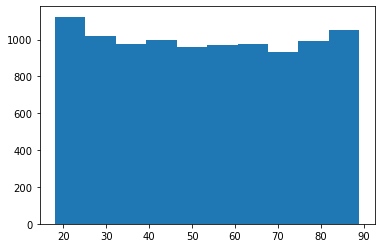

In [11]:
plt.hist(data_slice['Age'])

(array([3.822e+03, 3.560e+03, 1.624e+03, 6.570e+02, 2.200e+02, 8.100e+01,
        2.600e+01, 5.000e+00, 3.000e+00, 2.000e+00]),
 array([   348.67 ,  26203.873,  52059.076,  77914.279, 103769.482,
        129624.685, 155479.888, 181335.091, 207190.294, 233045.497,
        258900.7  ]),
 <BarContainer object of 10 artists>)

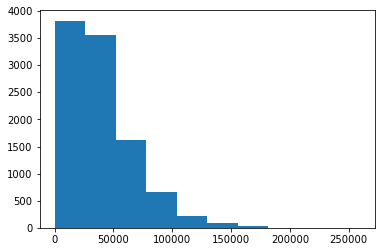

In [12]:
plt.hist(data_slice['Income'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

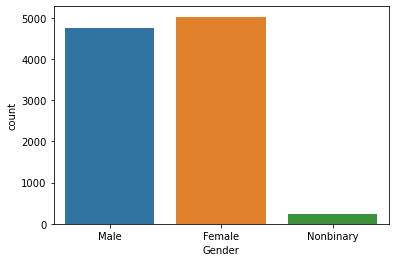

In [13]:
sns.countplot(x="Gender", data=data_slice)

<AxesSubplot:xlabel='Marital', ylabel='count'>

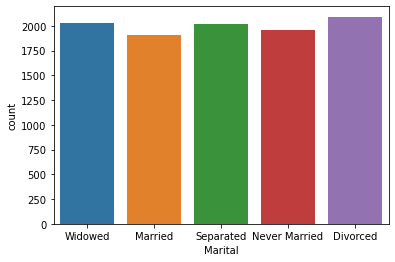

In [14]:
sns.countplot(x="Marital", data=data_slice)

<AxesSubplot:xlabel='Age', ylabel='Income'>

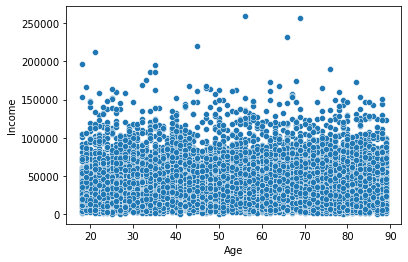

In [15]:
biv_cont_data = data_slice[['Age', 'Income']]
sns.scatterplot(x="Age", y="Income", data=biv_cont_data)

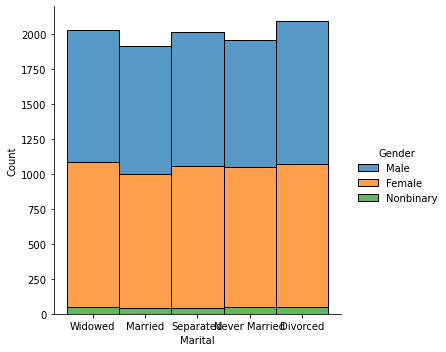

In [16]:
biv_cat_data = data_slice[['Gender', 'Marital']]
sns.displot(biv_cat_data, x='Marital', hue='Gender', multiple='stack')